In [1]:
# importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score

# for visualisation
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from IPython.display import Image  
from subprocess import call
from sklearn.tree import plot_tree

In [2]:
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# You can also drop whichever other columns you'd like here
titanic_df.drop("Cabin", axis=1, inplace= True)
titanic_df.drop("PassengerId", axis=1, inplace= True)
titanic_df.drop("Name", axis=1, inplace= True)
titanic_df.drop("Ticket", axis=1, inplace= True)

In [5]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [6]:
titanic_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [7]:
# Handle missing values (Example: fill missing Age with median)
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)


In [8]:
titanic_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

### One-Hot Encoding
One-hot encoding is a technique used to ensure that categorical variables are better represented in the machine. Let's take a look at the "Sex" column

In [9]:
titanic_df["Sex"].unique()

array(['male', 'female'], dtype=object)

Machine Learning classifiers don't know how to handle strings. As a result, you need to convert it into a categorical representation. There are two main ways to go about this:

Label Encoding: Assigning, for example, 0 for "male" and 1 for "female". The problem here is it intrinsically makes one category "larger than" the other category.

One-hot encoding: Assigning, for example, [1, 0] for "male" and [0, 1] for female. In this case, you have an array of size (n_categories,) and you represent a 1 in the correct index, and 0 elsewhere. In Pandas, this would show as extra columns. For example, rather than having a "Sex" column, it would be a "Sex_male" and "Sex_female" column. Then, if the person is male, it would simply show as a 1 in the "Sex_male" column and a 0 in the "Sex_female" column.

There is a nice and easy method that does this in pandas: get_dummies()

In [10]:
titanic_df = pd.get_dummies(titanic_df, prefix="Sex", columns=["Sex"])
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,S,0,1
1,1,1,38.0,1,0,71.2833,C,1,0
2,1,3,26.0,0,0,7.9250,S,1,0
3,1,1,35.0,1,0,53.1000,S,1,0
4,0,3,35.0,0,0,8.0500,S,0,1


Now, we do the same to the "Embarked" column.

In [11]:
titanic_df = pd.get_dummies(titanic_df, prefix="Embarked", columns=["Embarked"])
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [12]:
X= titanic_df.drop("Survived", axis=1)
y= titanic_df["Survived"]

In [13]:
# Splitting the original Dataset into train and test set 
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.20, random_state= 42)

In [14]:
# Splitting the training set to development and training set
X_train, X_dev, y_train, y_dev = train_test_split(X_train_full, y_train_full, test_size= 0.20, random_state=42)

In [15]:
# training a model without pruning
unpruned = DecisionTreeClassifier(max_depth=None, random_state=42)
unpruned.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

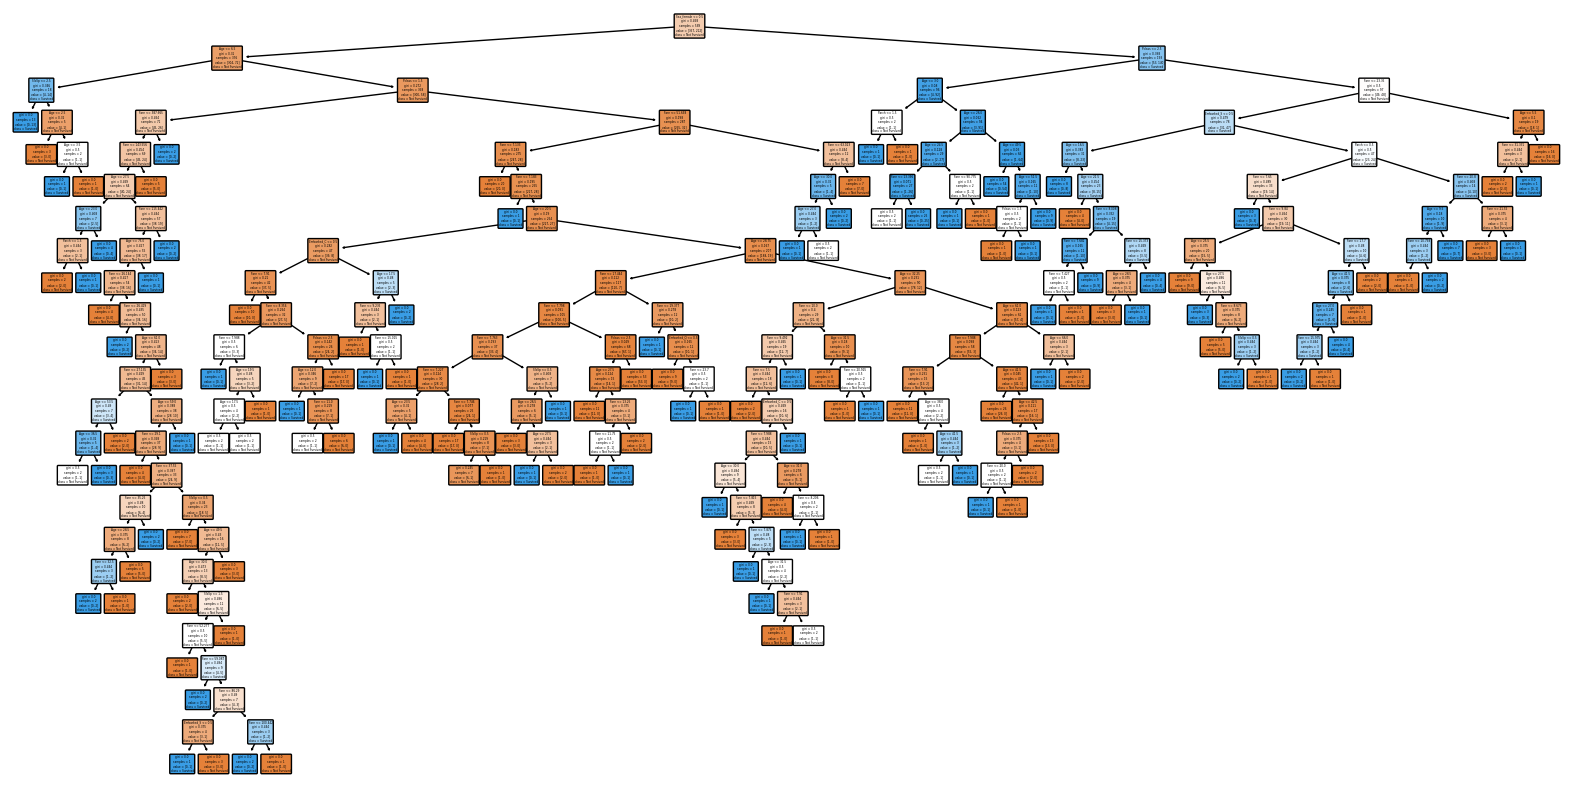

In [16]:
# Plot the decision tree
plt.figure(figsize=(20, 10))  # Set the figure size
plot_tree(unpruned, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'], rounded=True)
plt.show()


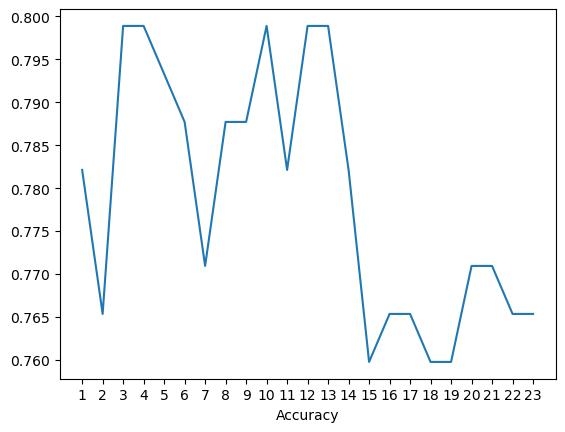

In [17]:
# looking at effect of pruning   
pruned_depths = range(1,unpruned.tree_.max_depth+1)

pruned_scores = [] 
for d in pruned_depths:
  clf = DecisionTreeClassifier(max_depth=d, random_state=42)
  clf.fit(X_train, y_train)
  score = clf.score(X_test, y_test)
  pruned_scores.append(score)

fig, ax = plt.subplots()
ax.plot(pruned_depths, pruned_scores)
plt.xlabel("Max_depth values")
plt.xlabel("Accuracy")
ax.xaxis.set_ticks(pruned_depths)
plt.show()

In [18]:
# fitting the chosen tree
best_depth = pruned_depths[np.argmax(pruned_scores)]
print('Best performance reached at depth of:', best_depth)

pruned = DecisionTreeClassifier(max_depth=best_depth)
pruned.fit(X, y)

Best performance reached at depth of: 3


DecisionTreeClassifier(max_depth=3)

In [19]:
# Set random seed
r = 42

# Create the classifiers
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=r)
base = DecisionTreeClassifier(max_depth=3, random_state=r)
ensemble = BaggingClassifier(estimator=base, n_estimators=100, random_state=r)
boosted_tree = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=r)

# Train the classifiers
rf.fit(X_train, y_train)
base.fit(X_train, y_train)
ensemble.fit(X_train, y_train)
boosted_tree.fit(X_train, y_train)

# Predict the response for test dataset for the models
y_test_pred_rf = rf.predict(X_test)
y_test_pred_base = base.predict(X_test)
y_test_pred_ensemble = ensemble.predict(X_test)
y_test_pred_boosted_tree = boosted_tree.predict(X_test)

# Print testing accuracies for all models
print(f'Testing Accuracy for base Decision Tree model: {accuracy_score(y_test, y_test_pred_base)}')
print(f'Testing Accuracy for ensemble Bagging model: {accuracy_score(y_test, y_test_pred_ensemble)}')
print(f'Testing Accuracy for Random Forest model: {accuracy_score(y_test, y_test_pred_rf)}')
print(f'Testing Accuracy for Boosted Tree model: {accuracy_score(y_test, y_test_pred_boosted_tree)}')


Testing Accuracy for base Decision Tree model: 0.7988826815642458
Testing Accuracy for ensemble Bagging model: 0.7988826815642458
Testing Accuracy for Random Forest model: 0.8379888268156425
Testing Accuracy for Boosted Tree model: 0.8044692737430168


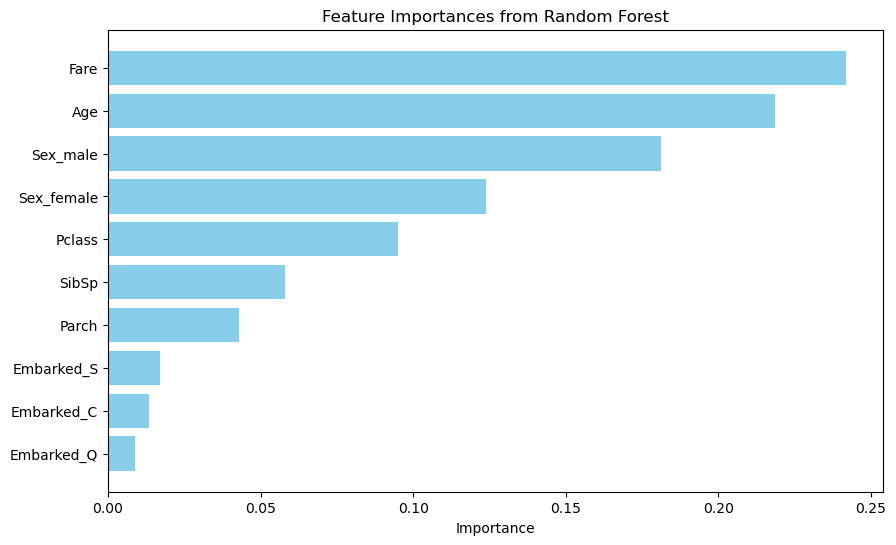

      Feature  Importance
8  Embarked_Q    0.008689
7  Embarked_C    0.013533
9  Embarked_S    0.016953
3       Parch    0.042783
2       SibSp    0.057807
0      Pclass    0.094848
5  Sex_female    0.123847
6    Sex_male    0.181218
1         Age    0.218467
4        Fare    0.241855


In [20]:
feature_importances = rf.feature_importances_

# Create a DataFrame for better visualization
features = X.columns
importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance
importances_df = importances_df.sort_values(by='Importance', ascending=True)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'], importances_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances from Random Forest')
plt.show()

# Print the sorted feature importances
print(importances_df)

- Age appears to be the most important features followed by the fare and sex and also the least important is the Embarked_Q

### Please i would like to know if the method of replacing the missing values in age column with the median was okay and also if it has not affected my report on the feature importance

In [21]:
# Defining the parameter grid for n_estimators and max_depth
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")

# Train the model with the best parameters
best_rf = RandomForestClassifier(random_state=42, n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'])
best_rf.fit(X_train, y_train)

# Predict the response for test dataset
y_test_pred = best_rf.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print(f'Testing Accuracy with tuned parameters: {accuracy}')

Best parameters found: {'max_depth': None, 'n_estimators': 50}
Testing Accuracy with tuned parameters: 0.8324022346368715


- Testing Accuracy for base Decision Tree model: 0.7988826815642458
- Testing Accuracy for ensemble Bagging model: 0.7988826815642458
- Testing Accuracy for Random Forest model: 0.8379888268156425
- Testing Accuracy for Boosted Tree model: 0.8044692737430168

- The Random forest model performed better with accuracy score of 83%(0.837) on n_estimator = 100 and max_depth= 10